<a href="https://colab.research.google.com/github/INCREDIBLE-AURNOB/Predict-personal-medical-cost/blob/main/Personal_medical_cost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets --quiet

In [2]:

import opendatasets as od
dataset=od.download("https://www.kaggle.com/datasets/mirichoi0218/insurance")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: alrafiaurnob
Your Kaggle Key: ··········


100%|██████████| 16.0k/16.0k [00:00<00:00, 12.2MB/s]

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import warnings
warnings.filterwarnings('ignore')

In [20]:
df=pd.read_csv('/content/insurance/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.shape

(1338, 7)

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(df.sex.drop_duplicates())
df.sex=le.transform(df.sex)
#smoker
le.fit(df.smoker.drop_duplicates())
df.smoker=le.transform(df.smoker)
#region
le.fit(df.region.drop_duplicates())
df.region=le.transform(df.region)

<Axes: >

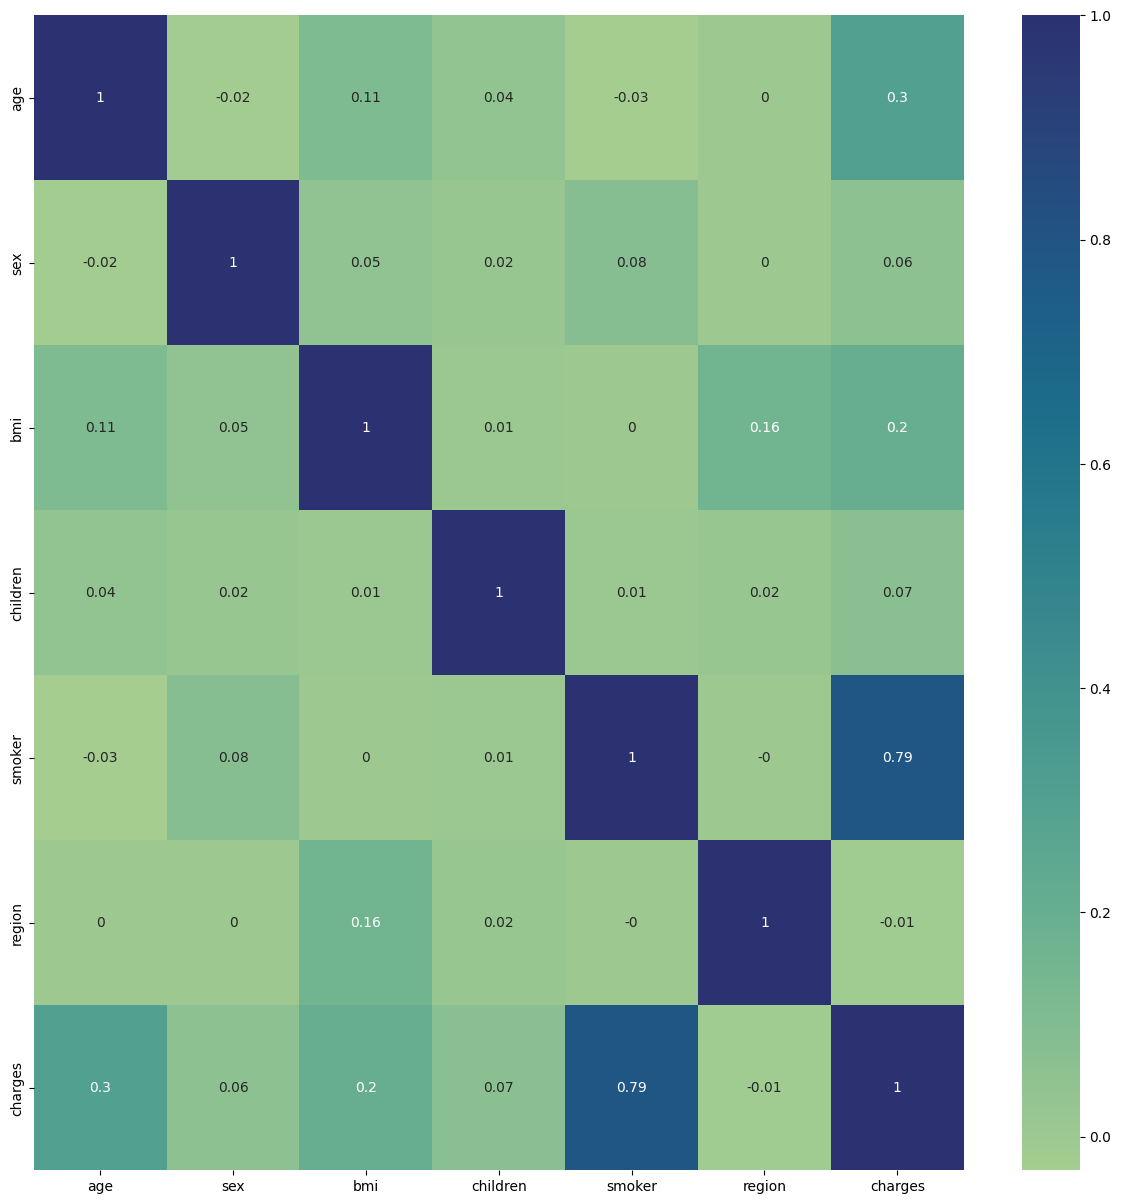

In [8]:
corr=df.corr().round(2)
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True,cmap='crest')

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

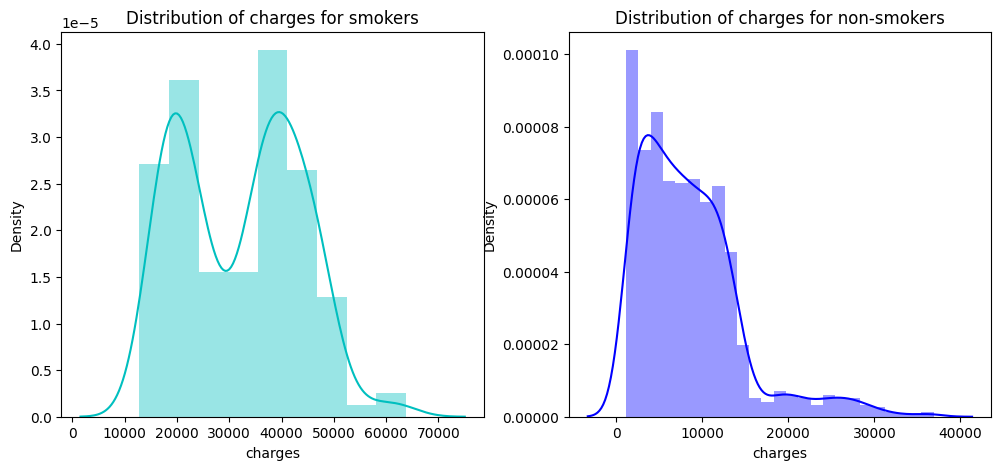

In [9]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(df[(df.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(df[(df.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

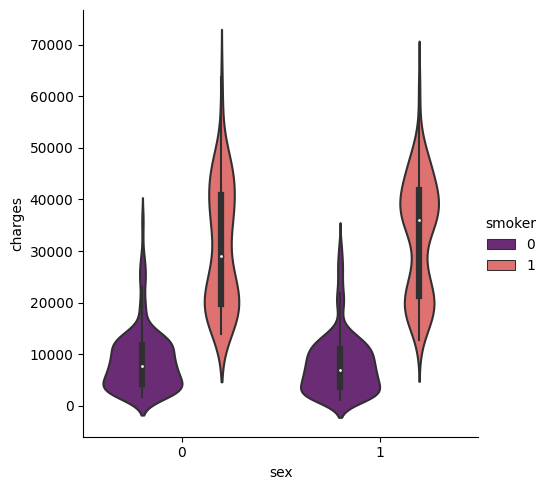

In [10]:
sns.catplot(x="sex",y="charges",hue="smoker",
            kind="violin",data=df,palette='magma')

In [11]:
plot_columns=['age','sex','bmi','children','smoker','region','charges']

In [12]:
def box_plot(data, columns):
    fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(20,25))
    for i, col in enumerate(columns):
        sns.boxplot(data[col], ax=axes[i])
        axes[i].set_xlabel(col)
    plt.tight_layout()
    plt.show()

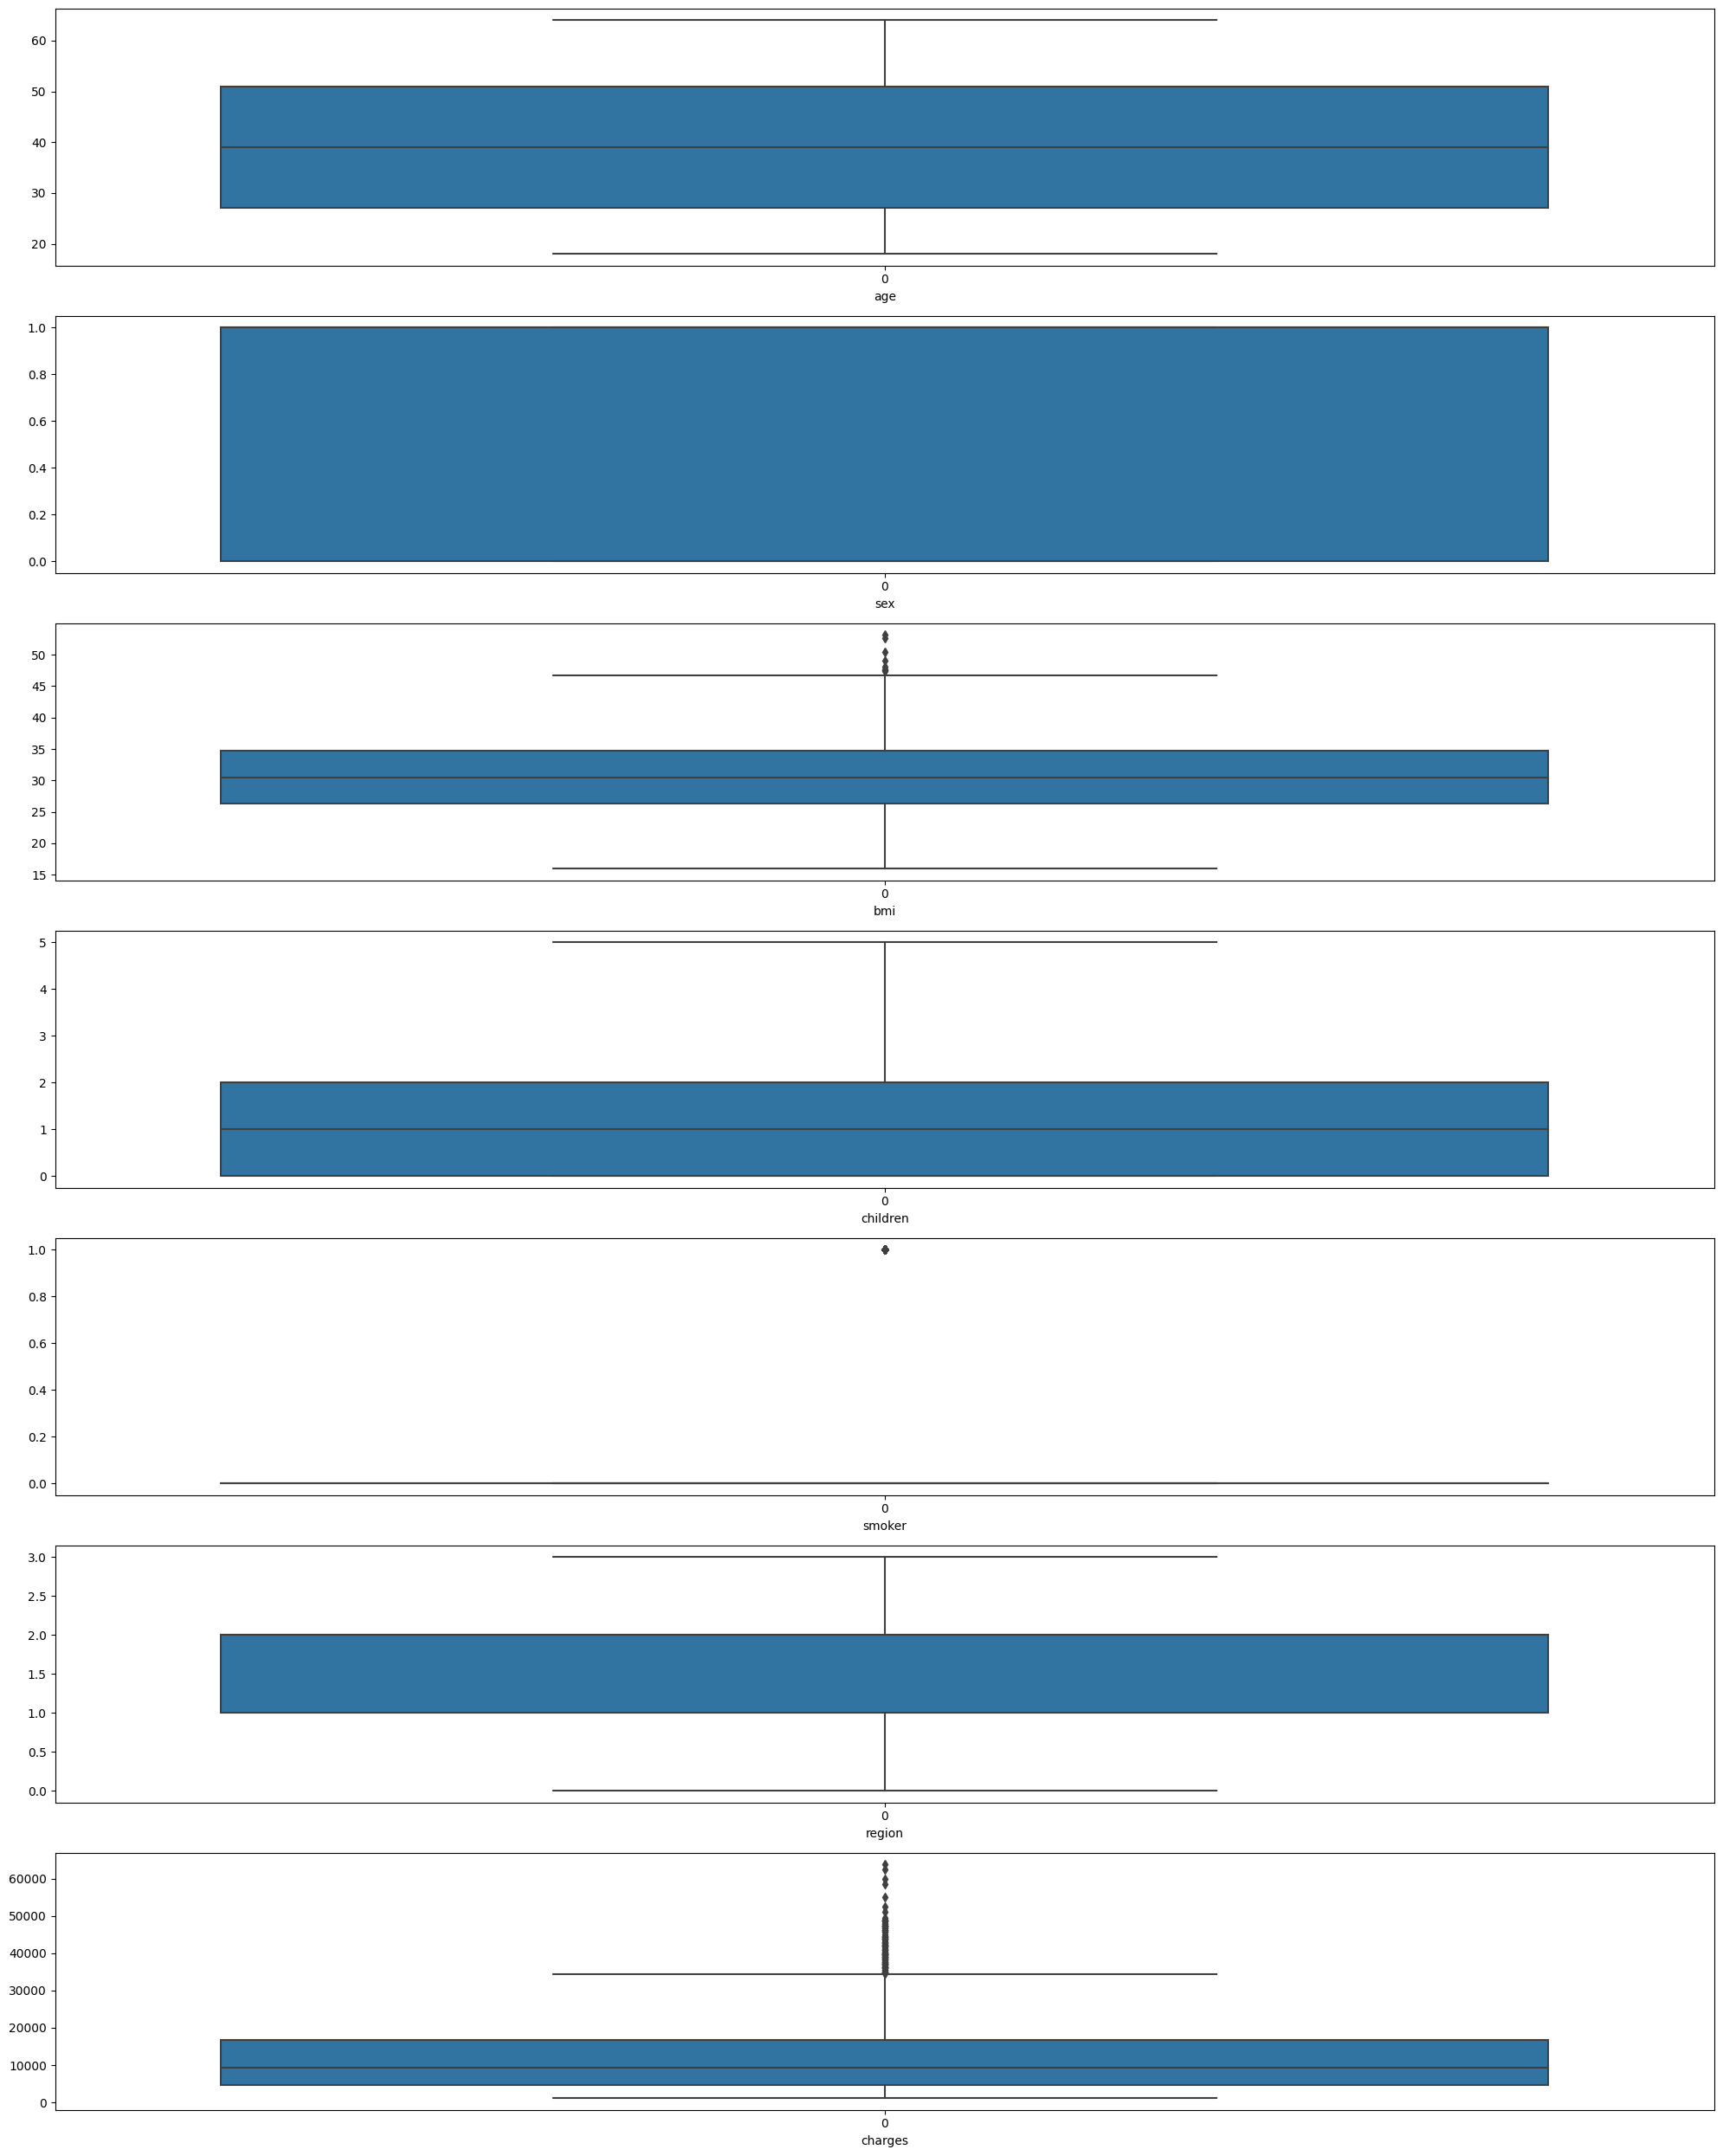

In [13]:
box_plot(df,plot_columns)

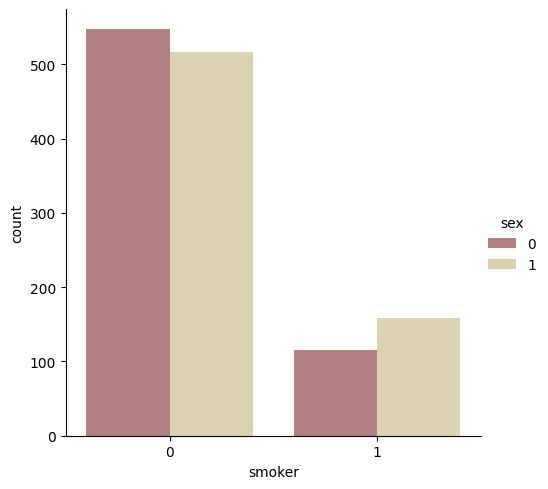

In [14]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=df)

Text(0.5, 1.0, 'The number of smokers and non-smokers (18 years old)')

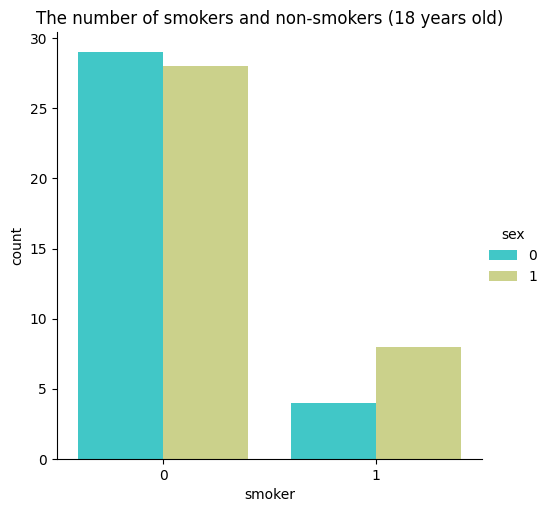

In [15]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="rainbow", data=df[(df.age == 18)])
plt.title("The number of smokers and non-smokers (18 years old)")

#### Lets see the charges for amokers and non smokers

<Axes: xlabel='smoker', ylabel='charges'>

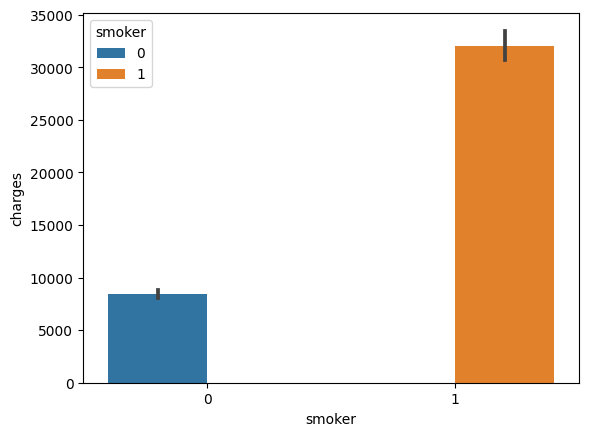

In [16]:
sns.barplot(data=df, x="smoker", y="charges",hue="smoker")

Text(0.5, 1.0, 'Smokers and non-smokers')

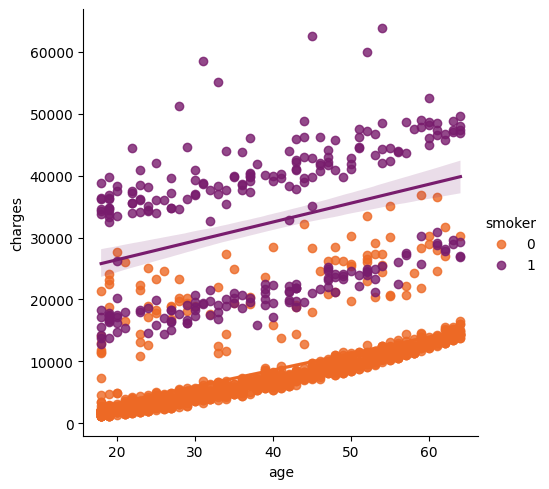

In [19]:
sns.lmplot(x="age", y="charges", hue="smoker", data=df, palette = 'inferno_r')
ax.set_title('Smokers and non-smokers')